<a href="https://colab.research.google.com/github/cysorianoc/IBM_Data_Science/blob/main/Week4_Insert_Update_SQLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/images/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>

# Create & Access SQLite database using Python

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

*   Create a database
*   Create a table
*   Insert data into the table
*   Query data from the table
*   Retrieve the result set into a pandas dataframe
*   Close the database connection


SQLite is a software library that implements a self-contained, serverless, zero-configuration, transactional SQL database engine. SQLite is the most widely deployed SQL database engine in the world.

## Task 1: Create database using SQLite


In [ ]:
#Install & load sqlite3

#!pip install sqlite3  ##Uncomment this code only if you are working in a local environment to install sqlite3
import sqlite3

In [ ]:
# Connecting to sqlite
# connection object
conn = sqlite3.connect('INSTRUCTOR.db')

Cursor class is an instance using which you can invoke methods that execute SQLite statements, fetch data from the result sets of the queries. You can create Cursor object using the cursor() method of the Connection object/class.


In [ ]:
# cursor object
cursor_obj = conn.cursor()

## Task 2: Create a table in the database

In this step we will create a table in the database with following details:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/images/table.png" align="center">


Before creating a table, let's first check if the table already exists or not. To drop the table from a database, use the **DROP** query. A cursor is an object that helps execute the query and fetch the records from the database.


In [ ]:
# Drop the table if already exists.
cursor_obj.execute("DROP TABLE IF EXISTS INSTRUCTOR")

## Dont worry if you get this error:

If you see an exception/error similar to the following, indicating that INSTRUCTOR is an undefined name, that's okay. It just implies that the INSTRUCTOR table does not exist in the table - which would be the case if you had not created it previously.

<strong>Exception: \[IBM]\[CLI Driver]\[DB2/LINUXX8664] SQL0204N  "ABC12345.INSTRUCTOR" is an undefined name.  SQLSTATE=42704 SQLCODE=-204</strong>


In [ ]:
# Creating table
table = """ create table IF NOT EXISTS INSTRUCTOR(ID INTEGER PRIMARY KEY NOT NULL, FNAME VARCHAR(20), LNAME VARCHAR(20), CITY VARCHAR(20), CCODE CHAR(2));"""

cursor_obj.execute(table)

print("Table is Ready")

Table is Ready


## Task 3: Insert data into the table

In this step we will insert some rows of data into the table.

The INSTRUCTOR table we created in the previous step contains 3 rows of data:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/images/table1.png" align="center">

We will start by inserting just the first row of data, i.e. for instructor Rav Ahuja


In [ ]:
cursor_obj.execute('''insert into INSTRUCTOR values (1, 'Rav', 'Ahuja', 'TORONTO', 'CA')''')

The output you will get something as: <strong>sqlite3.Cursor at 0x27a1a491260</strong> which means mySql database has sqlite3.Cursor object at 0x27a1a49126 as output in table. But you may get the different number.

Now use a single query to insert the remaining two rows of data


In [ ]:
cursor_obj.execute('''insert into INSTRUCTOR values (2, 'Raul', 'Chong', 'Markham', 'CA'), (3, 'Hima', 'Vasudevan', 'Chicago', 'US')''')

In [ ]:
table

' create table IF NOT EXISTS INSTRUCTOR(ID INTEGER PRIMARY KEY NOT NULL, FNAME VARCHAR(20), LNAME VARCHAR(20), CITY VARCHAR(20), CCODE CHAR(2));'

## Task 4: Query data in the table

In this step we will retrieve data we inserted into the INSTRUCTOR table.


In [ ]:
statement = '''SELECT * FROM INSTRUCTOR'''
cursor_obj.execute(statement)

print("All the data")
output_all = cursor_obj.fetchall()
for row_all in output_all:
  print(row_all)

All the data
(1, 'Rav', 'Ahuja', 'TORONTO', 'CA')
(2, 'Raul', 'Chong', 'Markham', 'CA')
(3, 'Hima', 'Vasudevan', 'Chicago', 'US')


In [ ]:
## Fetch few rows from the table
statement = '''SELECT * FROM INSTRUCTOR'''
cursor_obj.execute(statement)

print("All the data")
# If you want to fetch few rows from the table we use fetchmany(numberofrows) and mention the number how many rows you want to fetch
output_many = cursor_obj.fetchmany(2)
for row_many in output_many:
  print(row_many)

All the data
(1, 'Rav', 'Ahuja', 'TORONTO', 'CA')
(2, 'Raul', 'Chong', 'Markham', 'CA')


In [ ]:
# Fetch only FNAME from the table
statement = '''SELECT FNAME FROM INSTRUCTOR'''
cursor_obj.execute(statement)

print("All the data")
output_column = cursor_obj.fetchall()
for fetch in output_column:
  print(fetch)

All the data
('Rav',)
('Raul',)
('Hima',)


<Strong>Bonus: now write and execute an update statement that changes the Rav's CITY to MOOSETOWN</strong>


In [ ]:
query_update='''update INSTRUCTOR set CITY='MOOSETOWN' where FNAME="Rav"'''
cursor_obj.execute(query_update)

In [ ]:
statement = '''SELECT * FROM INSTRUCTOR'''
cursor_obj.execute(statement)

print("All the data")
output1 = cursor_obj.fetchmany(2)
for row in output1:
  print(row)

All the data
(1, 'Rav', 'Ahuja', 'MOOSETOWN', 'CA')
(2, 'Raul', 'Chong', 'Markham', 'CA')


## Task 5: Retrieve data into Pandas

In this step we will retrieve the contents of the INSTRUCTOR table into a Pandas dataframe


In [ ]:
import pandas as pd
#retrieve the query results into a pandas dataframe
df = pd.read_sql_query("select * from instructor;", conn)

#print the dataframe
df

,ID,FNAME,LNAME,CITY,CCODE
0,1,Rav,Ahuja,MOOSETOWN,CA
1,2,Raul,Chong,Markham,CA
2,3,Hima,Vasudevan,Chicago,US


In [ ]:
#print just the LNAME for first row in the pandas data frame
df.LNAME[0]

'Ahuja'

Once the data is in a Pandas dataframe, you can do the typical pandas operations on it.

For example you can use the shape method to see how many rows and columns are in the dataframe


In [ ]:
df.shape

(3, 5)

## Task 6: Close the Connection

We free all resources by closing the connection. Remember that it is always important to close connections so that we can avoid unused connections taking up resources.


In [ ]:
# Close the connection
conn.close()

## Summary

In this tutorial you created a database & table in Python notebook using SQLite3. Then created a table and insert a few rows of data into it. Then queried the data. You also retrieved the data into a pandas dataframe.


## Author

<a href="https://www.linkedin.com/in/ravahuja/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01" target="_blank">Rav Ahuja</a>

<a href="https://www.linkedin.com/in/malika-goyal-04798622/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01" target="_blank">Malika</a>

## Other Contributor(s)

<a href="https://www.linkedin.com/in/lakshmi-holla-b39062149/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01" target="_blank">Lakshmi Holla</a>

```{toggle} ## Change Log
```

```{toggle} | Date (YYYY-MM-DD) | Version | Changed By | Change Description        |
```
```{toggle} | ----------------- | ------- | ---------- | ------------------------- |
```
```{toggle} | 2022-03-03        | 1.0     | Malika     | Created lab using sqlite3 |
```

## <h3 align="center"> © IBM Corporation 2022. All rights reserved. <h3/>


# Example 2

Here I will use one of the previous .sql scripts to create a table and obtain a dataframe.

.sql script:

```
drop table if exists PETRESCUE;

create table PETRESCUE (
	ID INTEGER NOT NULL,
	ANIMAL VARCHAR(20),
	QUANTITY INTEGER,
	COST DECIMAL(6,2),
	RESCUEDATE DATE,
	PRIMARY KEY (ID)
	);

insert into PETRESCUE values
	(1,'Cat',9,450.09,'2018-05-29'),
	(2,'Dog',3,666.66,'2018-06-01'),
	(3,'Dog',1,100.00,'2018-06-04'),
	(4,'Parrot',2,50.00,'2018-06-04'),
	(5,'Dog',1,75.75,'2018-06-10'),
	(6,'Hamster',6,60.60,'2018-06-11'),
	(7,'Cat',1,44.44,'2018-06-11'),
	(8,'Goldfish',24,48.48,'2018-06-14'),
	(9,'Dog',2,222.22,'2018-06-15')

;
```
The following are the steps:


In [ ]:
#1 Connect to sqlite and create the name of the database
conn = sqlite3.connect('PETRESCUE.db')

In [ ]:
#2 create a cursor object
cursor_obj = conn.cursor()

In [ ]:
# 3 line 1 from .sql scroipt Drop the table if already exists.
cursor_obj.execute("DROP TABLE IF EXISTS PETRESCUE")

In [ ]:
#4 Create the table by running the second part of the script: here we define the name of the columns and the table primary key
table_2="""create table PETRESCUE (
	ID INTEGER NOT NULL,
	ANIMAL VARCHAR(20),
	QUANTITY INTEGER,
	COST DECIMAL(6,2),
	RESCUEDATE DATE,
	PRIMARY KEY (ID)
	);"""

In [ ]:
#5 here you run the query mentioned in the previous block
cursor_obj.execute(table_2)

print("Table is Ready")

Table is Ready


In [ ]:
# 6 fill the table running the remaining block of code
cursor_obj.execute('''insert into PETRESCUE values
	(1,'Cat',9,450.09,'2018-05-29'),
	(2,'Dog',3,666.66,'2018-06-01'),
	(3,'Dog',1,100.00,'2018-06-04'),
	(4,'Parrot',2,50.00,'2018-06-04'),
	(5,'Dog',1,75.75,'2018-06-10'),
	(6,'Hamster',6,60.60,'2018-06-11'),
	(7,'Cat',1,44.44,'2018-06-11'),
	(8,'Goldfish',24,48.48,'2018-06-14'),
	(9,'Dog',2,222.22,'2018-06-15')''')

In [ ]:
#7 Query in the data table: see if the table is ok
statement = '''SELECT * FROM PETRESCUE'''
cursor_obj.execute(statement)

print("All the data")
output_all = cursor_obj.fetchall()
for row_all in output_all:
  print(row_all)

All the data
(1, 'Cat', 9, 450.09, '2018-05-29')
(2, 'Dog', 3, 666.66, '2018-06-01')
(3, 'Dog', 1, 100, '2018-06-04')
(4, 'Parrot', 2, 50, '2018-06-04')
(5, 'Dog', 1, 75.75, '2018-06-10')
(6, 'Hamster', 6, 60.6, '2018-06-11')
(7, 'Cat', 1, 44.44, '2018-06-11')
(8, 'Goldfish', 24, 48.48, '2018-06-14')
(9, 'Dog', 2, 222.22, '2018-06-15')


In [ ]:
#8 Now, transform the table into a pandas dataframe
import pandas as pd
#retrieve the query results into a pandas dataframe
df2 = pd.read_sql_query("select * from PETRESCUE;", conn)

#print the dataframe
df2

,ID,ANIMAL,QUANTITY,COST,RESCUEDATE
0,1,Cat,9,450.09,2018-05-29
1,2,Dog,3,666.66,2018-06-01
2,3,Dog,1,100.00,2018-06-04
3,4,Parrot,2,50.00,2018-06-04
4,5,Dog,1,75.75,2018-06-10
5,6,Hamster,6,60.60,2018-06-11
6,7,Cat,1,44.44,2018-06-11
7,8,Goldfish,24,48.48,2018-06-14
8,9,Dog,2,222.22,2018-06-15


In [ ]:
# Close the connection
conn.close()

In [ ]:
df2

,ID,ANIMAL,QUANTITY,COST,RESCUEDATE
0,1,Cat,9,450.09,2018-05-29
1,2,Dog,3,666.66,2018-06-01
2,3,Dog,1,100.00,2018-06-04
3,4,Parrot,2,50.00,2018-06-04
4,5,Dog,1,75.75,2018-06-10
5,6,Hamster,6,60.60,2018-06-11
6,7,Cat,1,44.44,2018-06-11
7,8,Goldfish,24,48.48,2018-06-14
8,9,Dog,2,222.22,2018-06-15


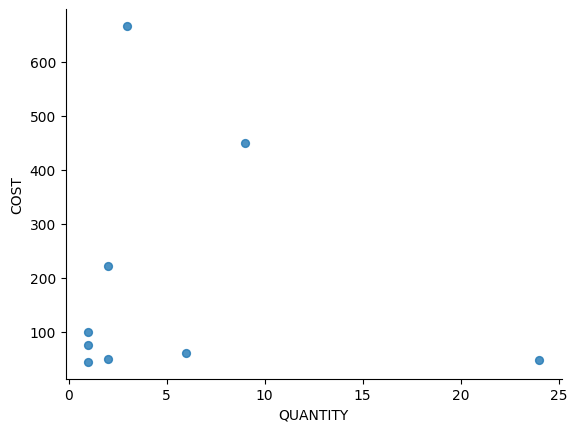

In [ ]:
from matplotlib import pyplot as plt
df2.plot(kind='scatter', x='QUANTITY', y='COST', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='QUANTITY', ylabel='COST'>

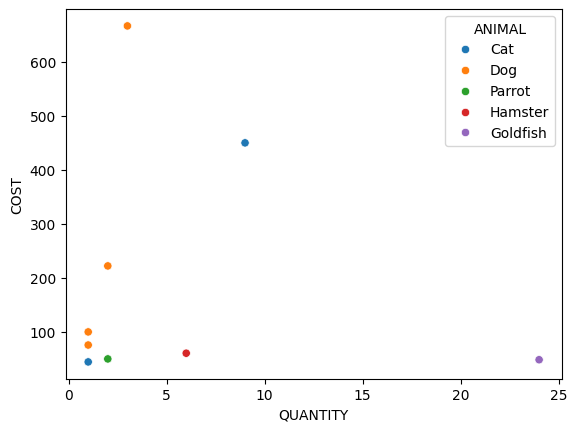

In [ ]:
import seaborn as sns
sns.scatterplot(data=df2, x='QUANTITY', y='COST', hue='ANIMAL')